In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#import dataset
df=pd.read_csv(r'C:\Users\Prabashwara Randeni\Desktop\Data Analytics\UK Data Science Job Data Cleaning\CSV Load\Cleaned_Data.CSV')

In [3]:
#inspec data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 635 entries, 0 to 634
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company          635 non-null    object 
 1   Company Score    635 non-null    float64
 2   Job Title        635 non-null    object 
 3   Date             635 non-null    int64  
 4   Salary           635 non-null    float64
 5   Skills           635 non-null    object 
 6   Estimation Type  635 non-null    object 
 7   Job Type         635 non-null    object 
 8   City             581 non-null    object 
 9   Country          581 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 49.7+ KB


## Top 5 Cities to get a Data Science Job in UK

C:\Users\Prabashwara Randeni\AppData\Local\Temp\ipykernel_16136\234248685.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City', y='Job Count', data=top_5_cities, palette='Set2')


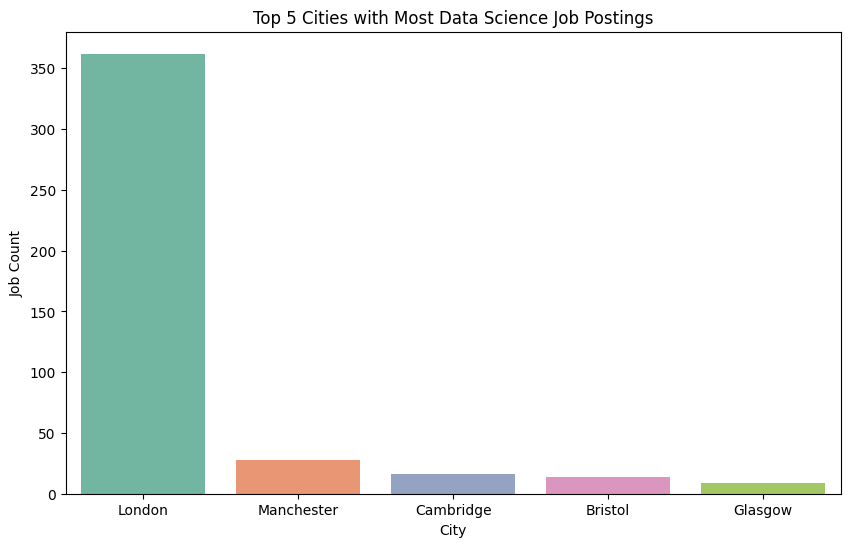

In [4]:
#Group by city and count the number of job postings
city_job_count = df.groupby('City')['Job Title'].count().reset_index()

#Rename columns for clarity
city_job_count.columns = ['City', 'Job Count']

#Sort by job count and get the top 5 cities
top_5_cities = city_job_count.sort_values(by='Job Count', ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x='City', y='Job Count', data=top_5_cities, palette='Set2')

plt.title('Top 5 Cities with Most Data Science Job Postings')
plt.xlabel('City')
plt.ylabel('Job Count')

plt.show()


## Average Salary of Top 5 Cities

C:\Users\Prabashwara Randeni\AppData\Local\Temp\ipykernel_16136\292828333.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City', y='Average Salary', data=average_salary_top_5_cities, palette='coolwarm')


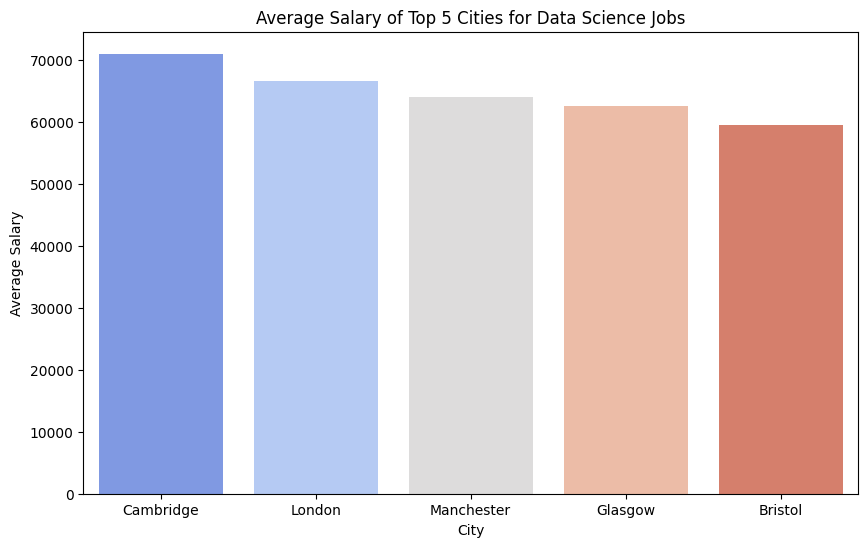

In [5]:
#Filter the original data to only include rows from the top 5 cities
top_5_cities_list = top_5_cities['City'].tolist()
top_5_cities_data = df[df['City'].isin(top_5_cities_list)]

#Group by city and calculate the average salary
average_salary_top_5_cities = top_5_cities_data.groupby('City')['Salary'].mean().reset_index()

#Rename columns for clarity
average_salary_top_5_cities.columns = ['City', 'Average Salary']

#Sort the average salaries in ascending order
average_salary_top_5_cities = average_salary_top_5_cities.sort_values(by='Average Salary', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='City', y='Average Salary', data=average_salary_top_5_cities, palette='coolwarm')

plt.title('Average Salary of Top 5 Cities for Data Science Jobs')
plt.xlabel('City')
plt.ylabel('Average Salary')

plt.show()


## Salary Estimation Type

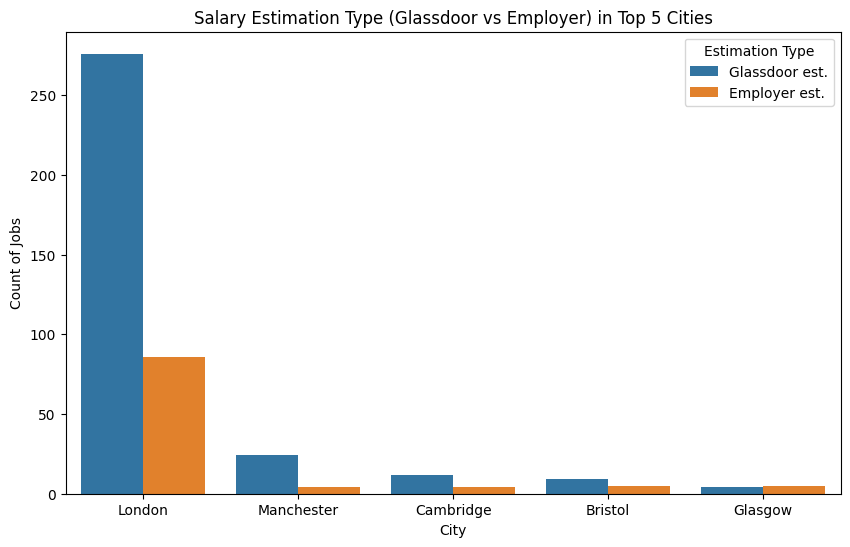

In [6]:
#Filter the data for the top 5 cities
top_5_cities_list = top_5_cities['City'].tolist()
top_5_cities_data = df[df['City'].isin(top_5_cities_list)]

#Group by city and estimation type, counting job titles
estimation_type_count = top_5_cities_data.groupby(['City', 'Estimation Type'])['Job Title'].count().reset_index()

#Rename columns for clarity
estimation_type_count.columns = ['City', 'Estimation Type', 'Count']

#Sort the data by 'Count' in descending order
estimation_type_count = estimation_type_count.sort_values(by='Count', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='City', y='Count', hue='Estimation Type', data=estimation_type_count)

plt.title('Salary Estimation Type (Glassdoor vs Employer) in Top 5 Cities')
plt.xlabel('City')
plt.ylabel('Count of Jobs')

plt.show()


## OnSite vs Remote Data Science Job Salary

C:\Users\Prabashwara Randeni\AppData\Local\Temp\ipykernel_16136\1883211556.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Job Type', y='Salary', data=onsite_remote_salary, palette='coolwarm')


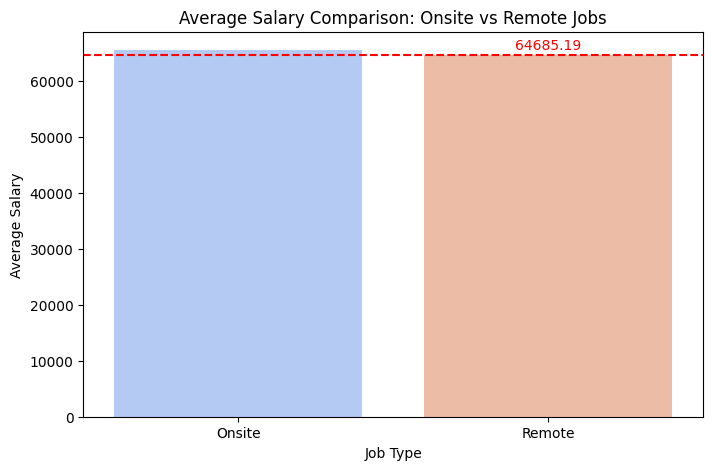

In [26]:
#Create a new column 'Job Type' (Remote vs Onsite)
df['Job Type'] = df['City'].apply(lambda x: 'Onsite' if pd.notna(x) and x.strip() != '' else 'Remote')

#Group by 'Job Type' and calculate the average salary
onsite_remote_salary = df.groupby('Job Type')['Salary'].mean().reset_index()

#Sort for better visualization (optional)
onsite_remote_salary = onsite_remote_salary.sort_values(by='Salary', ascending=False)

#Calculate Remote job average salary
remote_avg_salary = onsite_remote_salary[onsite_remote_salary['Job Type'] == 'Remote']['Salary'].values[0]

#Plot the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x='Job Type', y='Salary', data=onsite_remote_salary, palette='coolwarm')

plt.axhline(remote_avg_salary, color='red', linestyle='--', label=f'Remote Job Avg Salary: {remote_avg_salary:.2f}')

plt.text(1, remote_avg_salary + 1000, f'{remote_avg_salary:.2f}', color='red', ha='center')

plt.title('Average Salary Comparison: Onsite vs Remote Jobs')
plt.xlabel('Job Type')
plt.ylabel('Average Salary')

plt.show()


- Based on the data analytics, we can conclude that there is no significant difference between the average salary of remote and onsite Data Science jobs in the UK. Therefore, choosing between remote or onsite positions should depend on your personal preferences and lifestyle, as both offer similar compensation.
  
- The majority of high-paying Data Science jobs are concentrated in London. If you are seeking a Data Science role in the UK, focusing your job search on London would likely increase your chances of securing a well-compensated position.
